In [23]:
!pip3 install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [25]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


Dataset

In [26]:
df = pd.read_csv('https://raw.githubusercontent.com/i-sumitkumar/Concordia/main/SaYoPillow.csv')
df.head(25)

,SR,RR,T,LM,BO,REM,SR.1,HR,SL
0,93.800,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.640,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.000,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.760,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.120,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0
5,56.880,19.376,95.376,9.376,94.064,83.44,6.376,58.44,1
6,47.000,16.800,97.200,5.600,95.800,68.00,7.800,52.00,0
7,50.000,18.000,99.000,8.000,97.000,80.00,9.000,55.00,0
8,45.280,16.112,96.168,4.224,95.112,61.12,7.112,50.28,0
9,55.520,19.104,95.104,9.104,93.656,82.76,6.104,57.76,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SR      630 non-null    float64
 1   RR      630 non-null    float64
 2   T       630 non-null    float64
 3   LM      630 non-null    float64
 4   BO      630 non-null    float64
 5   REM     630 non-null    float64
 6   SR.1    630 non-null    float64
 7   HR      630 non-null    float64
 8   SL      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [28]:
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of duplicated rows is:  0
Number of rows with NaNs is:  0


Exploratory Data Analysis

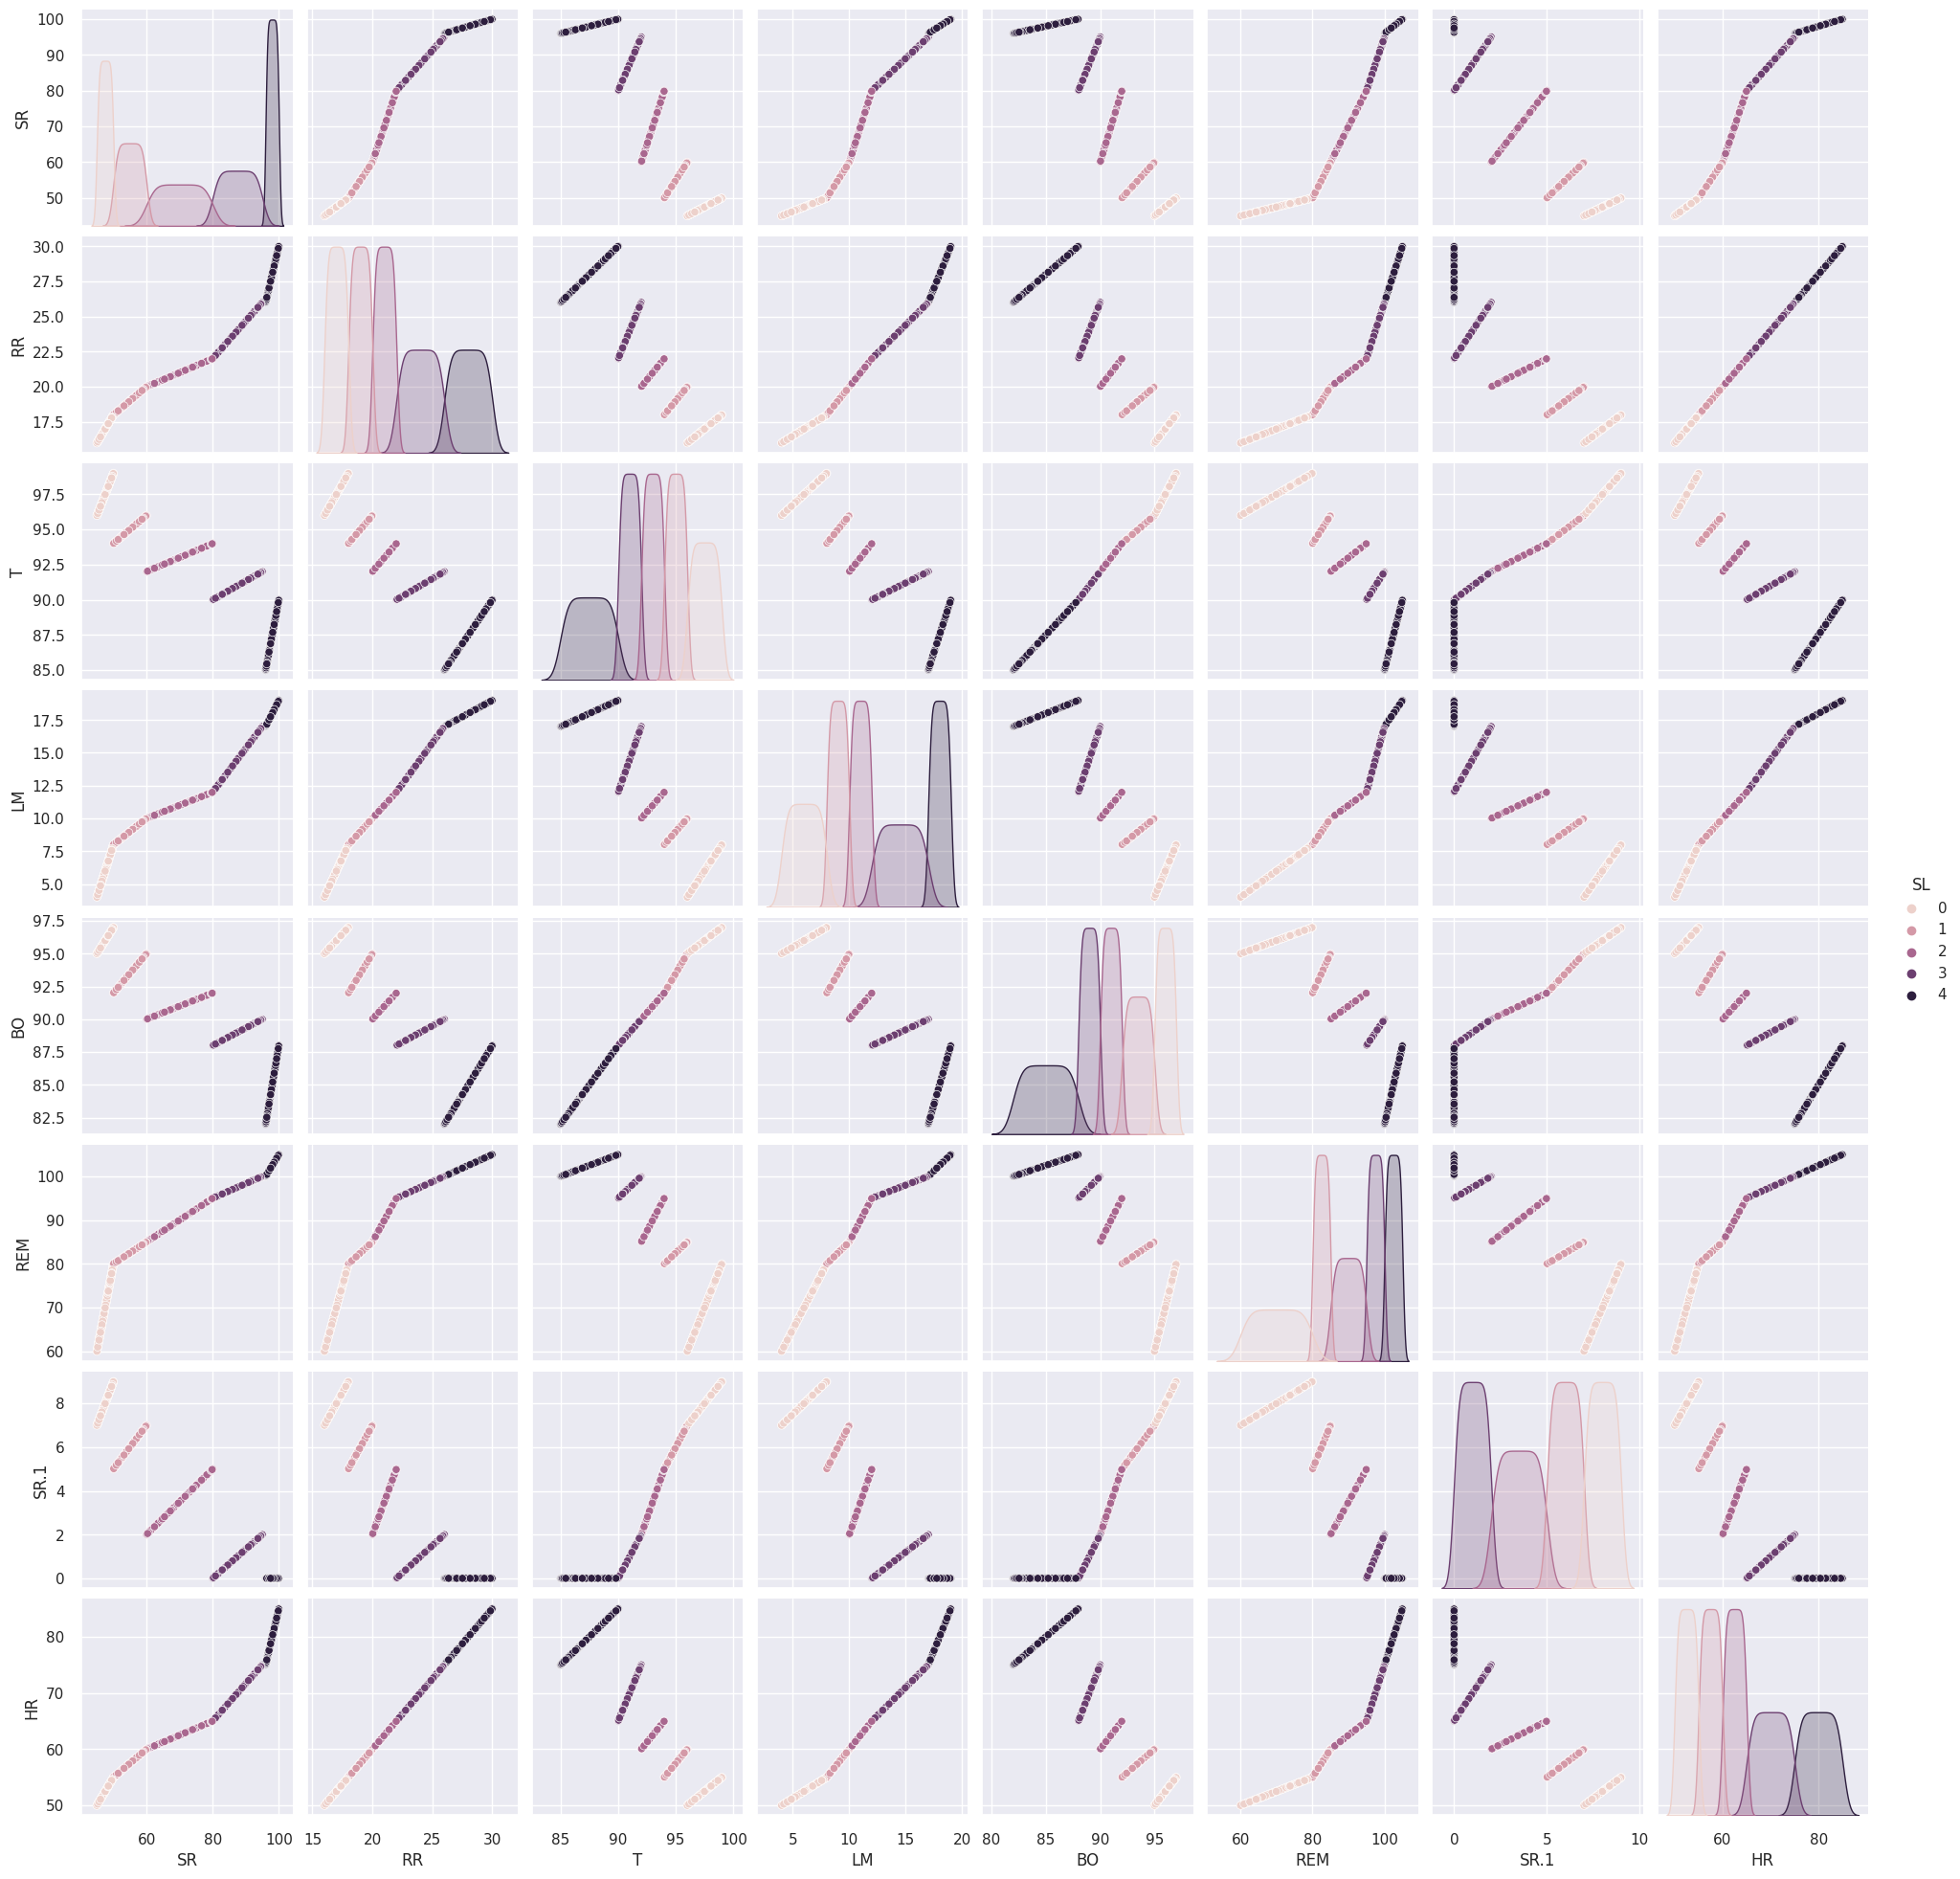

In [29]:
sns.pairplot(df, hue='SL')
plt.show()

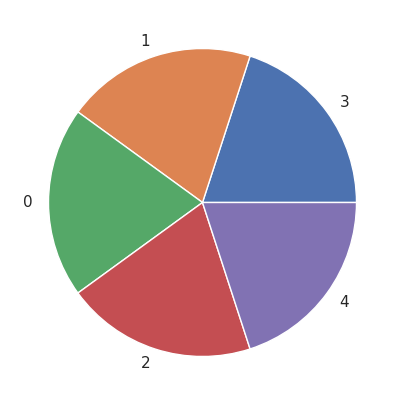

In [30]:
y=df['SL']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

Data Matrix

In [31]:
X = df.drop(columns=['SL'])
X.head(10)

,SR,RR,T,LM,BO,REM,SR.1,HR
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12
5,56.88,19.376,95.376,9.376,94.064,83.44,6.376,58.44
6,47.00,16.800,97.200,5.600,95.800,68.00,7.800,52.00
7,50.00,18.000,99.000,8.000,97.000,80.00,9.000,55.00
8,45.28,16.112,96.168,4.224,95.112,61.12,7.112,50.28
9,55.52,19.104,95.104,9.104,93.656,82.76,6.104,57.76


In [32]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SR,630.0,71.6,19.372833,45.0,52.50,70.0,91.25,100.0
RR,630.0,21.8,3.966111,16.0,18.50,21.0,25.00,30.0
T,630.0,92.8,3.529690,85.0,90.50,93.0,95.50,99.0
LM,630.0,11.7,4.299629,4.0,8.50,11.0,15.75,19.0
BO,630.0,90.9,3.902483,82.0,88.50,91.0,94.25,97.0
REM,630.0,88.5,11.893747,60.0,81.25,90.0,98.75,105.0
SR.1,630.0,3.7,3.054572,0.0,0.50,3.5,6.50,9.0
HR,630.0,64.5,9.915277,50.0,56.25,62.5,72.50,85.0


In [33]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,SR,RR,T,LM,BO,REM,SR.1,HR
0,1.146845,0.979066,-0.272195,1.140539,-0.271838,0.934005,-0.609407,0.979066
1,1.035260,0.833720,-0.353853,0.972949,-0.345696,0.873421,-0.703767,0.833720
2,-0.599252,-0.454206,0.907316,-0.395697,1.051448,-0.294506,1.081206,-0.454206
3,0.731501,0.438056,-0.576145,0.516734,-0.546753,0.708498,-0.960635,0.438056
4,-1.212970,-1.148636,1.438095,-1.211299,1.371498,-1.347997,1.490099,-1.148636
5,-0.760431,-0.611664,0.730389,-0.540941,0.811410,-0.425772,0.876760,-0.611664
6,-1.270828,-1.261683,1.247559,-1.419854,1.256609,-1.724964,1.343317,-1.261683
7,-1.115849,-0.958879,1.757924,-0.861223,1.564349,-0.715229,1.736483,-0.958879
8,-1.359683,-1.435290,0.954950,-1.740136,1.080170,-2.303879,1.117902,-1.435290
9,-0.830688,-0.680299,0.653267,-0.604253,0.706778,-0.482990,0.787642,-0.680299


In [34]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SR,630.0,2.904202e-16,1.000795,-1.374148,-0.986700,-0.082656,1.015113,1.467135
RR,630.0,-1.832749e-16,1.000795,-1.463552,-0.832711,-0.201869,0.807477,2.069159
T,630.0,8.007704e-16,1.000795,-2.211582,-0.652133,0.056707,0.765548,1.757924
LM,630.0,1.719965e-16,1.000795,-1.792275,-0.744842,-0.162934,0.942690,1.699170
BO,630.0,-1.452101e-15,1.000795,-2.282411,-0.615482,0.025645,0.859110,1.564349
REM,630.0,5.639228e-18,1.000795,-2.398121,-0.610048,0.126217,0.862482,1.388386
SR.1,630.0,-5.216286e-17,1.000795,-1.212261,-1.048442,-0.065528,0.917387,1.736483
HR,630.0,4.229421e-18,1.000795,-1.463552,-0.832711,-0.201869,0.807477,2.069159


Observations and variables

In [35]:
observations = list(X.index)
variables = list(X.columns)

Box and Whisker Plots

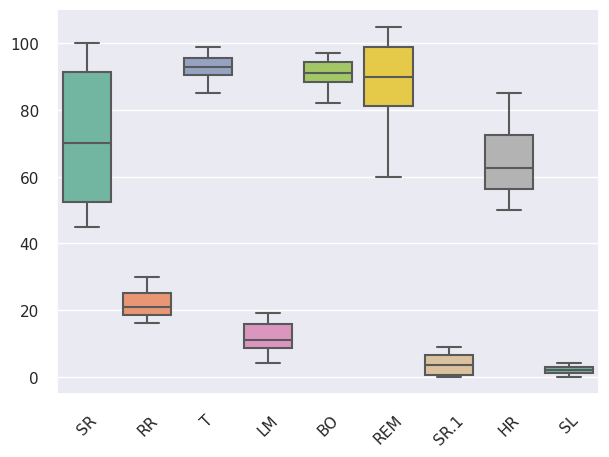

In [36]:
ax = plt.figure()
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

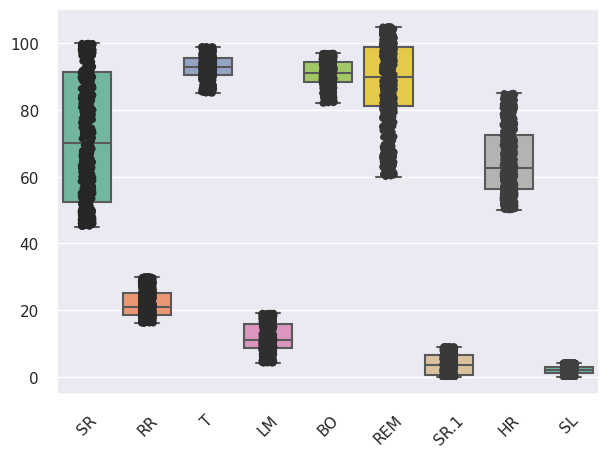

In [37]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=df, orient="v", palette="Set2")
ax = sns.stripplot(data=df, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

In [38]:
df.describe()

,SR,RR,T,LM,BO,REM,SR.1,HR,SL
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


Correlation Matrix

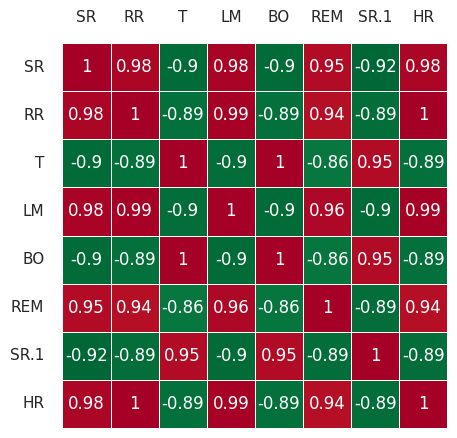

In [39]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
#plt.title('Covariance matrix')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, 'Z2')

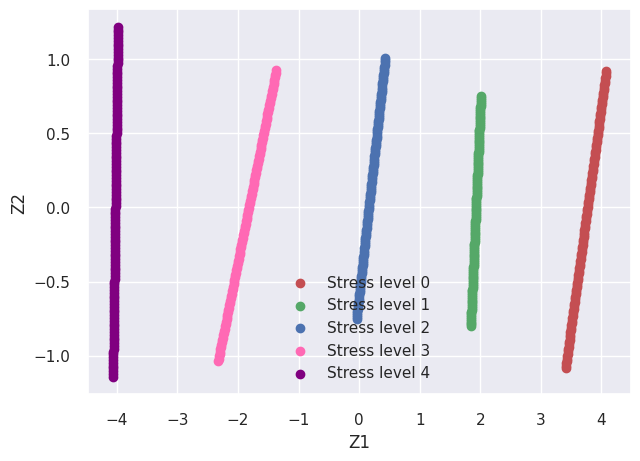

In [40]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(SL 0)->0,  2(SL 1)->1, 3(SL 2)->2, 3(SL 3)->3, 4(SL 4)->4
idx0 = np.where(y == 0)
idx1 = np.where(y == 1)
idx2 = np.where(y == 2)
idx3 = np.where(y == 3)
idx4 = np.where(y == 4)

plt. figure()
plt.scatter(Z[idx0,0], Z[idx0,1], c='r', label='Stress level 0 ')
plt.scatter(Z[idx1,0], Z[idx1,1], c='g', label='Stress level 1 ')
plt.scatter(Z[idx2,0], Z[idx2,1], c='b', label='Stress level 2 ')
plt.scatter(Z[idx3,0], Z[idx3,1], c='hotpink', label='Stress level 3 ')
plt.scatter(Z[idx4,0], Z[idx4,1], c='purple', label='Stress level 4 ')

plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')
     

**Eigen Vector**

[[-3.59031961e-01 -1.93650205e-01 -1.51616563e-02 -2.55599119e-01
   8.75380523e-01 -4.01014679e-02  1.16480275e-02  4.42578147e-16]
 [-3.57371760e-01 -2.91870375e-01  3.51339624e-01 -1.27751345e-01
  -2.55050818e-01 -2.85418489e-01 -2.86799381e-02 -7.07106781e-01]
 [ 3.48196591e-01 -5.07549757e-01 -1.83461645e-01 -2.42061564e-01
  -3.06866184e-02  6.56923880e-02 -7.23631980e-01 -2.49800181e-16]
 [-3.59763801e-01 -2.76554728e-01  7.64271416e-02  1.54354425e-01
  -1.23164607e-01  8.64940947e-01  3.35966008e-02 -5.55111512e-16]
 [ 3.48335197e-01 -4.95934139e-01 -1.69817812e-01 -3.58086293e-01
  -8.22099505e-02  2.69421526e-02  6.84224877e-01 -8.32667268e-17]
 [-3.49059001e-01 -2.82781603e-01 -7.09536659e-01  4.59509895e-01
  -9.66930235e-02 -2.70083485e-01  3.61404854e-02  3.05311332e-16]
 [ 3.49022130e-01 -3.63479831e-01  4.25571873e-01  6.92989215e-01
   2.67185134e-01 -9.67219996e-02  6.30670569e-02  3.88578059e-16]
 [-3.57371760e-01 -2.91870375e-01  3.51339624e-01 -1.27751345e-01
  -

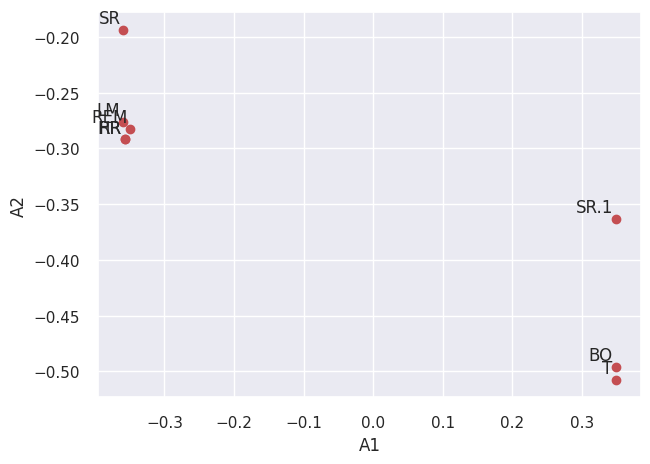

In [41]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
print(A)

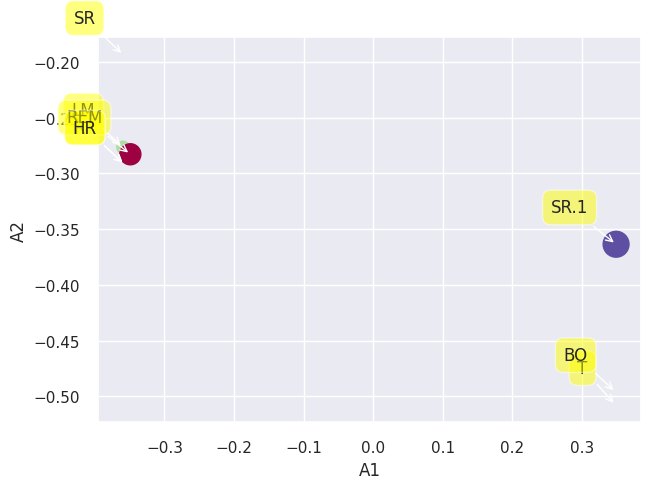

In [42]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Scree Plot

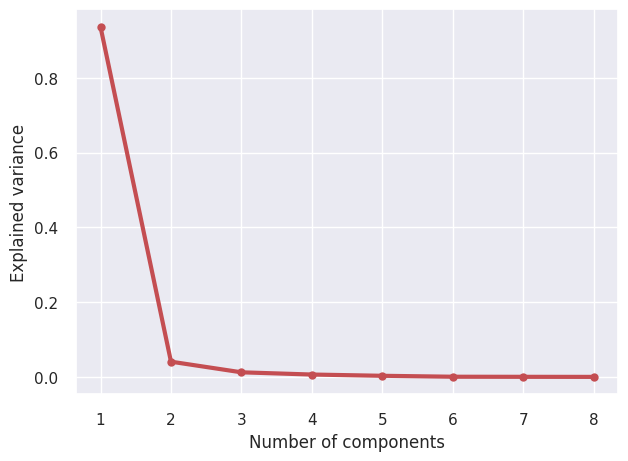

[7.50905794e+00 3.26465052e-01 9.82004459e-02 5.04414906e-02
 2.35893398e-02 3.46029125e-03 1.50404020e-03 1.14667028e-31]


In [43]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#print(f'Eigenvalues:\n{Lambda}')

#Scree plot
plt. figure()
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

print(Lambda)

Text(0, 0.5, 'Cumulative explained variance')

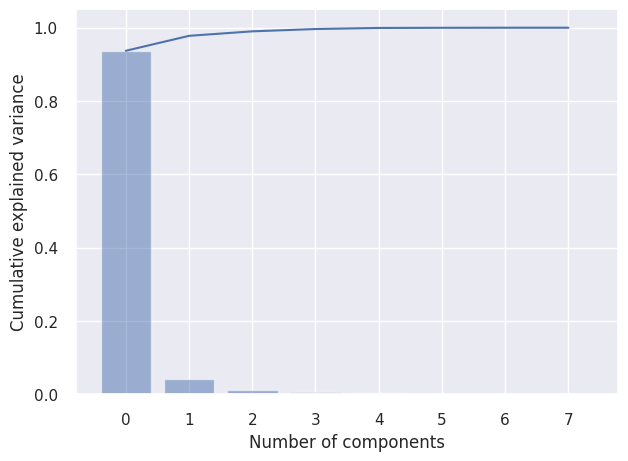

In [44]:
ell = pca.explained_variance_ratio_
plt.figure()
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**BIPLOT**

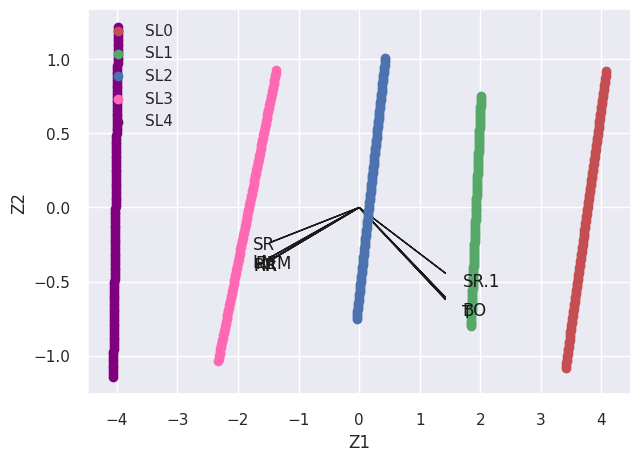

In [45]:
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx0,0], Z[idx0,1], c='r', label='SL0 ')
plt.scatter(Z[idx1,0], Z[idx1,1], c='g', label='SL1 ')
plt.scatter(Z[idx2,0], Z[idx2,1], c='b', label='SL2 ')
plt.scatter(Z[idx3,0], Z[idx3,1], c='hotpink', label='SL3 ')
plt.scatter(Z[idx4,0], Z[idx4,1], c='purple', label='SL4 ')

plt.legend(loc='upper left')

# **Using PCA Library**

In [46]:
!pip install pca
     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Principal Components

In [48]:
out['PC']

,PC1,PC2
0,-2.250047,-0.878675
1,-2.111753,-0.596370
2,1.844494,-0.801057
3,-1.735288,0.172126
4,3.661345,-0.330122
...,...,...
625,0.203803,0.160748
626,3.618319,-0.458267
627,-4.010066,0.330290
628,1.867121,-0.590271


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '2 Principal Components explain [99.01%] of the variance'}, xlabel='PC1 (93.7% expl.var)', ylabel='PC2 (4.07% expl.var)'>)

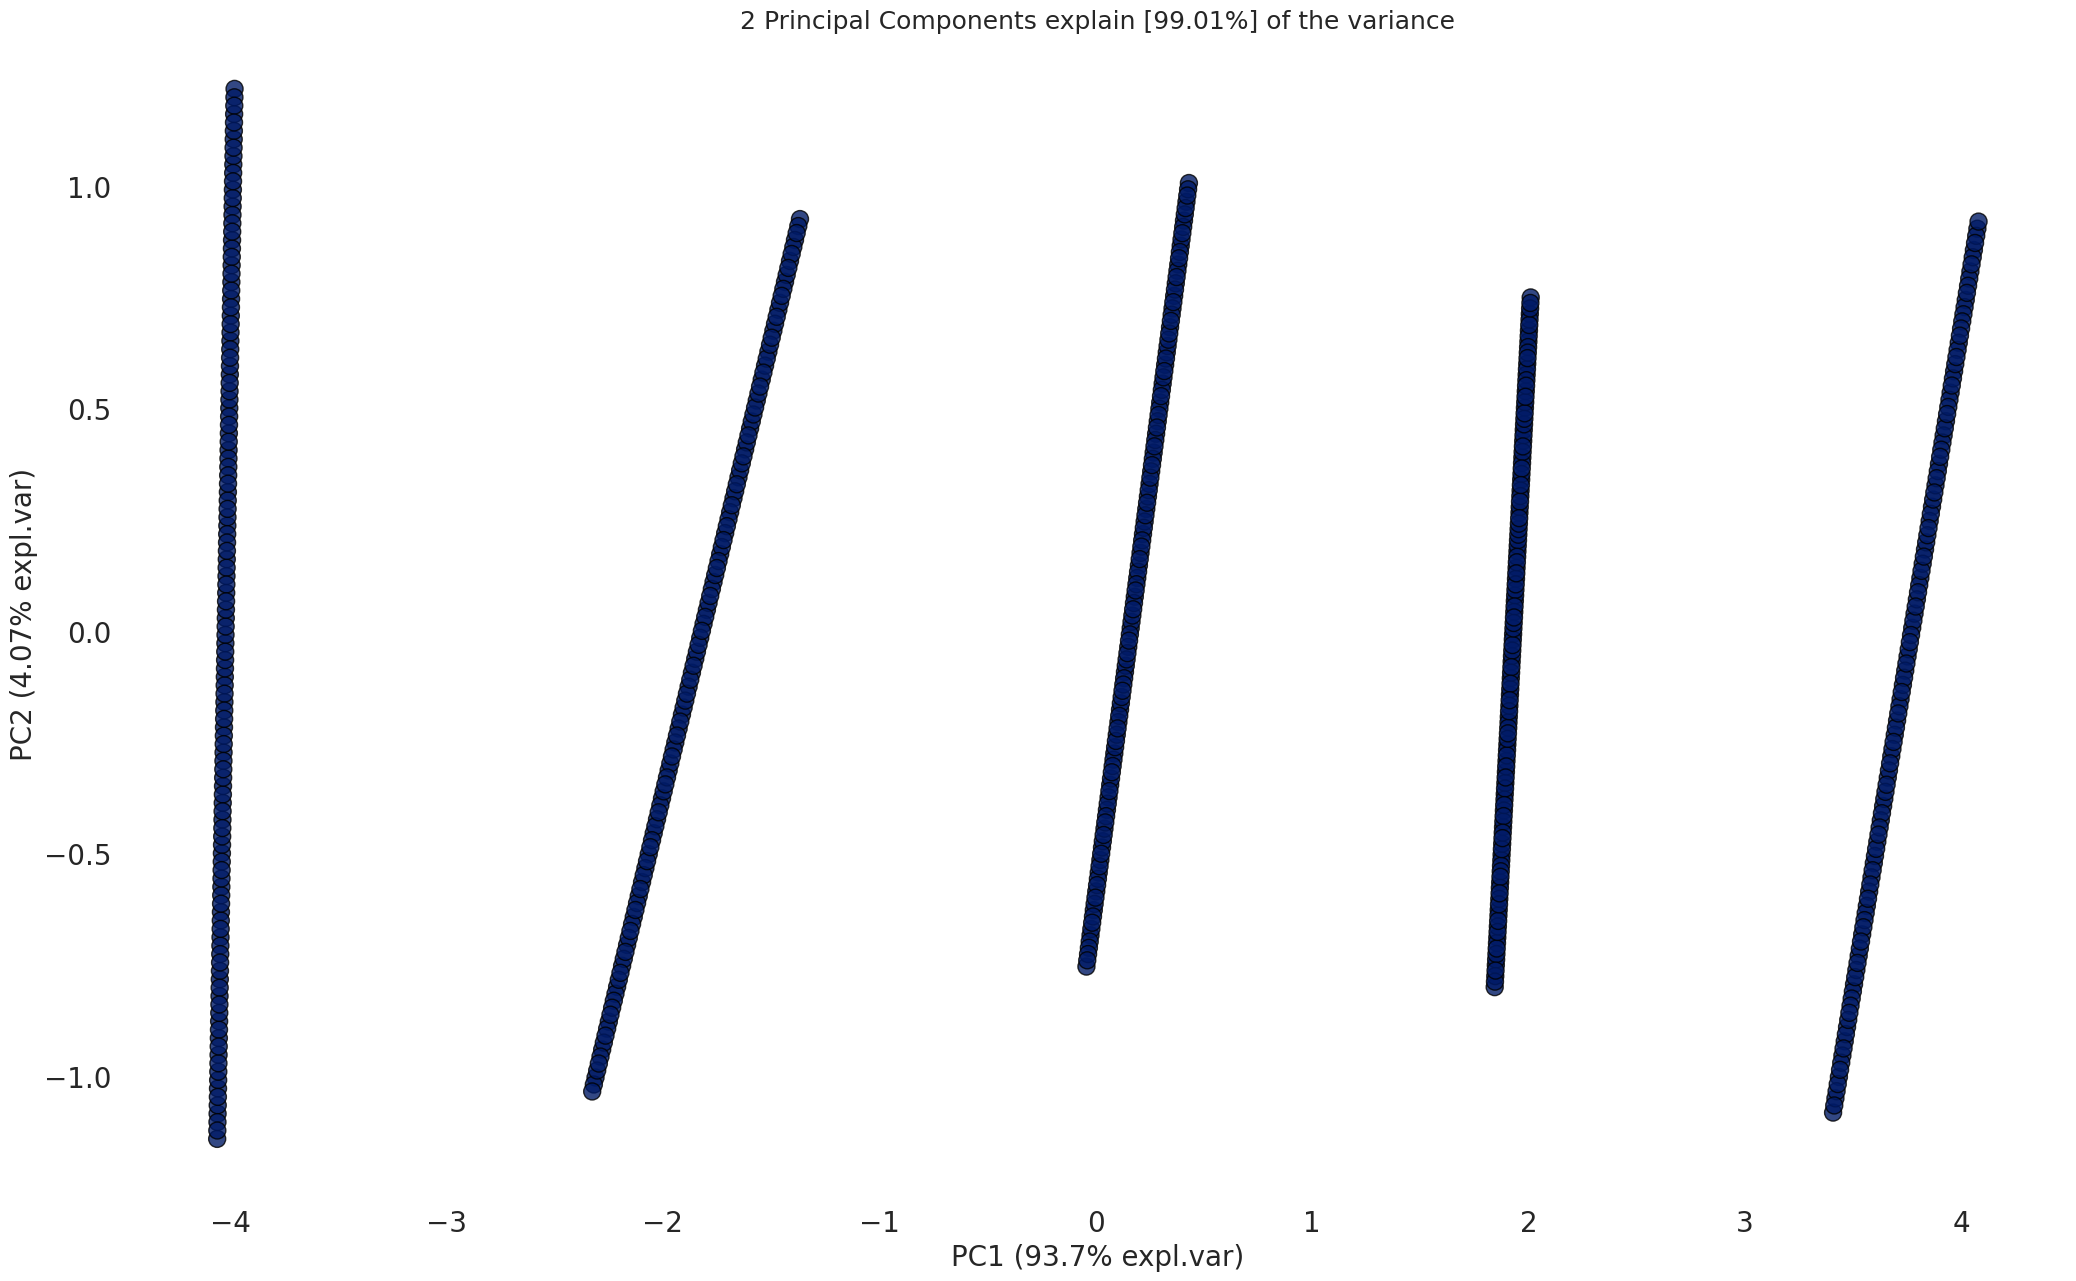

In [49]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [50]:
A = out['loadings'].T

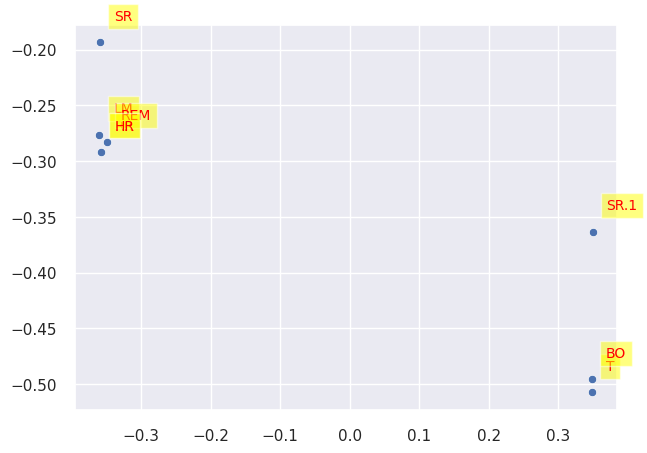

In [51]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('')
plt.ylabel('')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

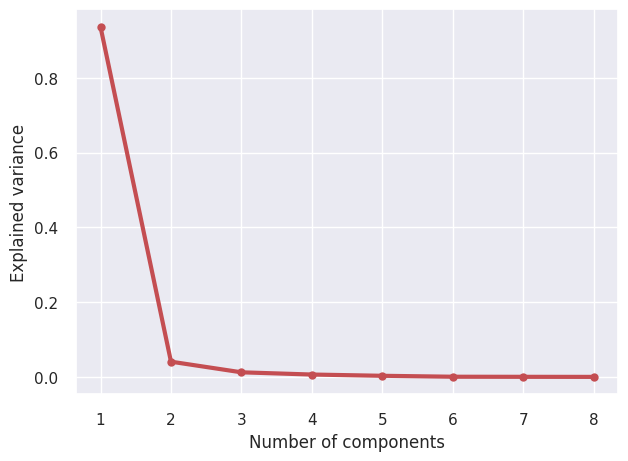

In [52]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

Explained Variance Plot

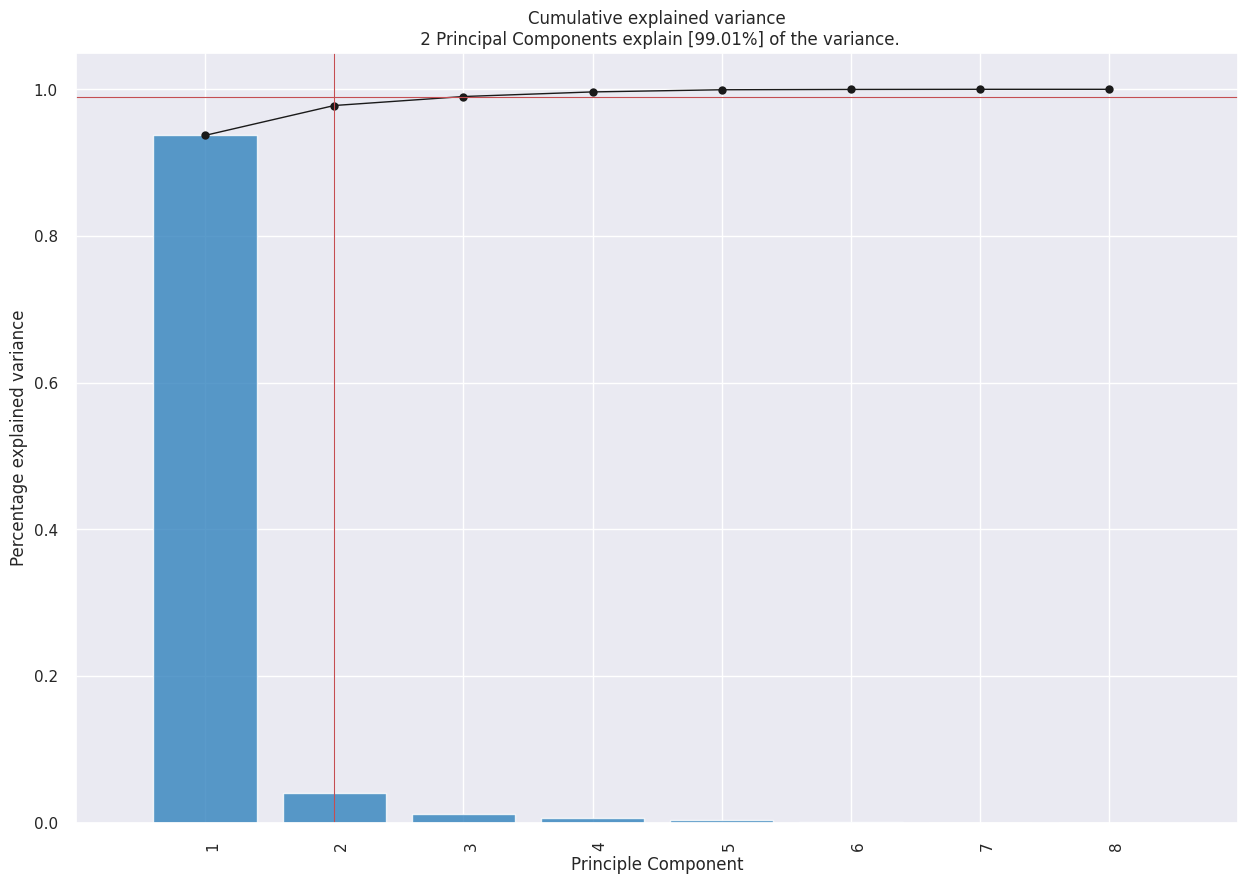

<Figure size 700x500 with 0 Axes>

In [53]:
model.plot();

Biplot

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


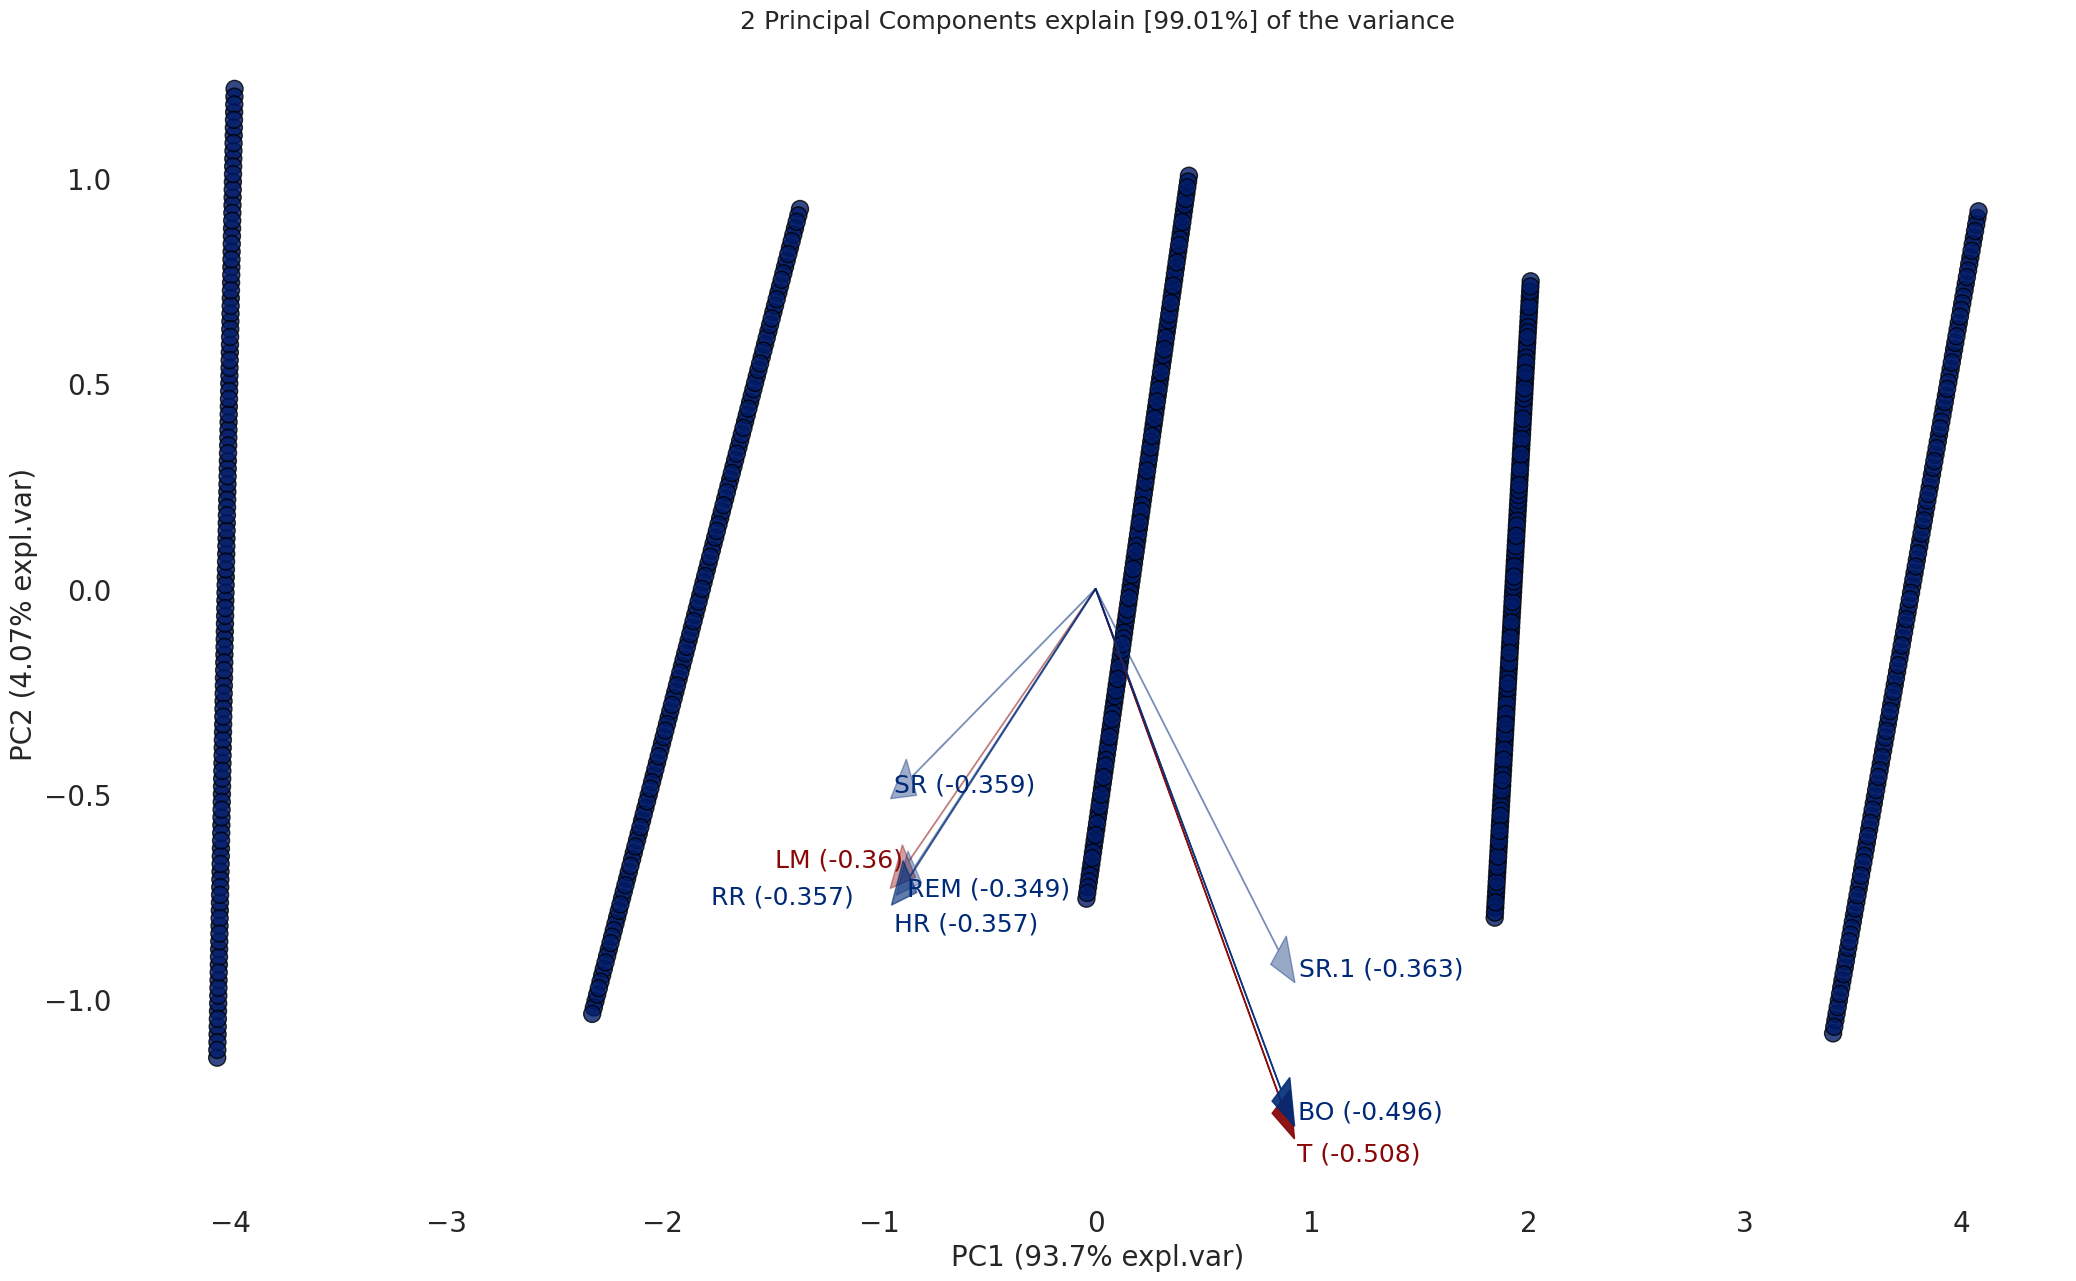

(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '2 Principal Components explain [99.01%] of the variance'}, xlabel='PC1 (93.7% expl.var)', ylabel='PC2 (4.07% expl.var)'>)

In [54]:
model.biplot(label=False, legend=False)

# Classification
Using PyCaret **bold text** **bold text**

In [55]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (567, 9)
Unseen Data For Predictions: (63, 9)


**Setting up the Environment in PyCaret**

In [56]:
from pycaret.classification import *
clf = setup(data=data, target='SL', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,SL
2,Target type,Multiclass
3,Original data shape,"(567, 9)"
4,Transformed data shape,"(567, 9)"
5,Transformed train set shape,"(396, 9)"
6,Transformed test set shape,"(171, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


**Comparing All Models**

In [57]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2740
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2620
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4680
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2440
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3300
lightgbm,Light Gradient Boosting Machine,0.9950,0.9985,0.9950,0.9956,0.9950,0.9937,0.9939,0.1920
rf,Random Forest Classifier,0.9874,1.0000,0.9874,0.9892,0.9872,0.9842,0.9847,1.1670
xgboost,Extreme Gradient Boosting,0.9849,0.9984,0.9849,0.9865,0.9848,0.9811,0.9815,0.1700
gbc,Gradient Boosting Classifier,0.9824,0.9931,0.9824,0.9847,0.9822,0.9779,0.9786,0.9240
dt,Decision Tree Classifier,0.9773,0.9857,0.9773,0.9802,0.9769,0.9716,0.9725,0.4230


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [58]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create Decision Tree Classifier**

In [59]:
dt= create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [60]:
#trained model object is stored in the variable 'dt'. 
dt

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [61]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [62]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression Model**

In [63]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

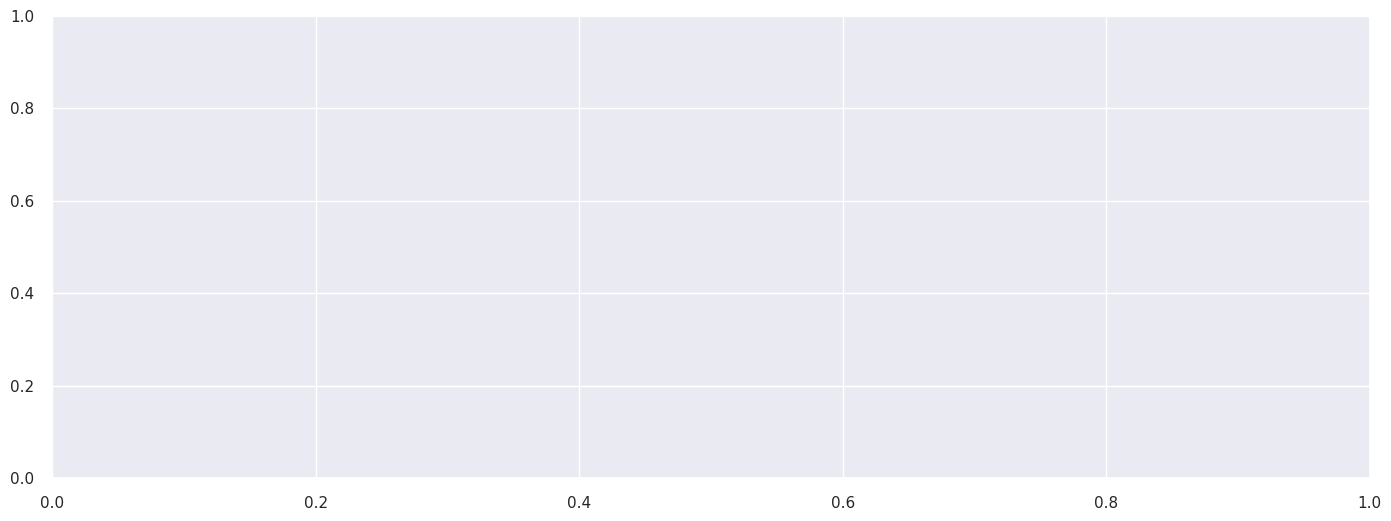

In [64]:
evaluate_model(tuned_dt)

**Create K Neighbors Model**

In [65]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Tune K Neighbors Model

In [66]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate K Neighbors Model**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

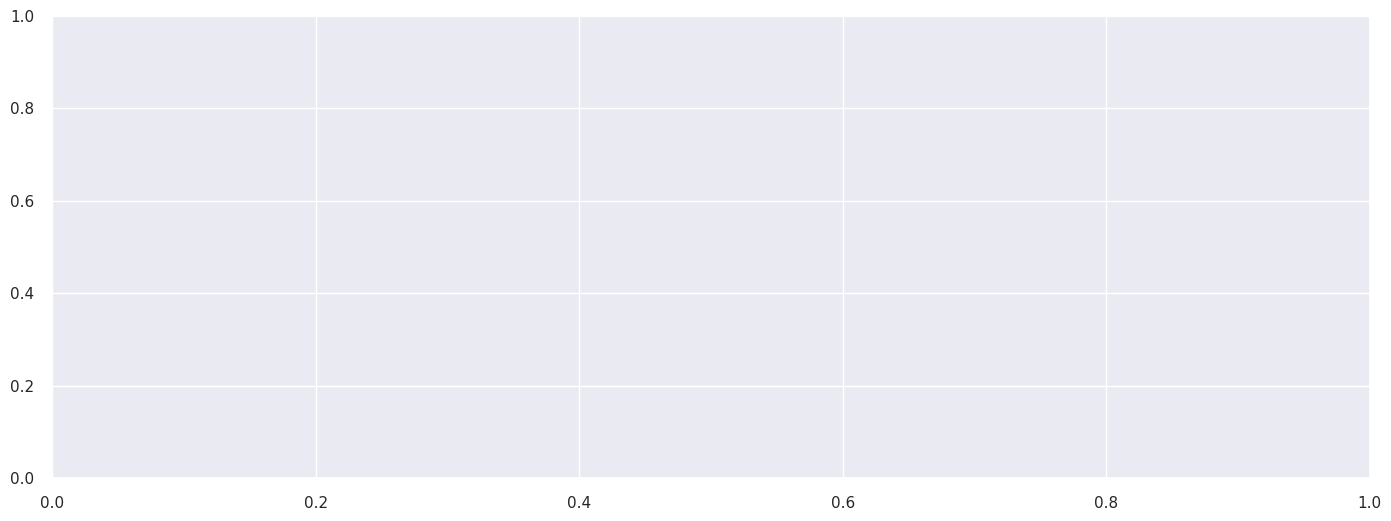

In [67]:
evaluate_model(tuned_knn)

**Create Logistic Regression Model**

In [68]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Logistic Regression Model**

In [69]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Logistic Regression Model**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

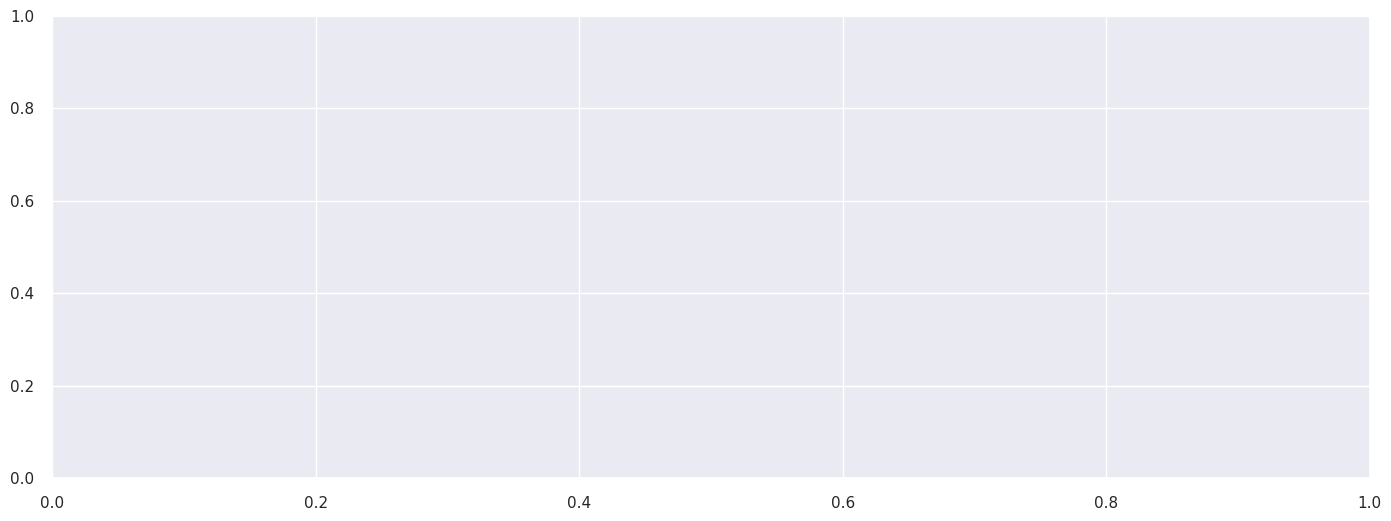

In [70]:
evaluate_model(tuned_lr)

**Create Random Forest Model**

In [71]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9500,1.0000,0.9500,0.9591,0.9489,0.9373,0.9403
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9750,1.0000,0.9750,0.9778,0.9749,0.9688,0.9695
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9744,1.0000,0.9744,0.9772,0.9743,0.9679,0.9687
8,0.9744,1.0000,0.9744,0.9776,0.9744,0.9680,0.9688


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Model**

In [72]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9750,1.0000,0.9750,0.9775,0.9748,0.9687,0.9694
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9750,1.0000,0.9750,0.9778,0.9749,0.9688,0.9695
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9750,1.0000,0.9750,0.9778,0.9749,0.9688,0.9695
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9744,1.0000,0.9744,0.9772,0.9743,0.9679,0.9687


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Random Forest Model**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

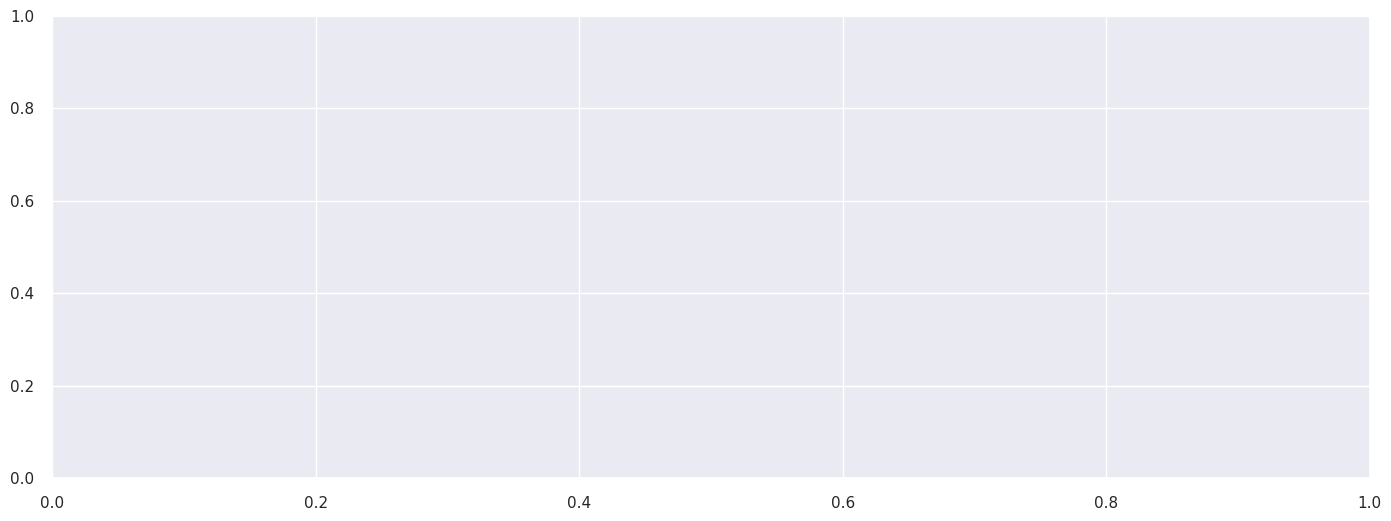

In [73]:
evaluate_model(tuned_rf)

# **Tune the Best Model**

In [74]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [75]:
tuned_best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

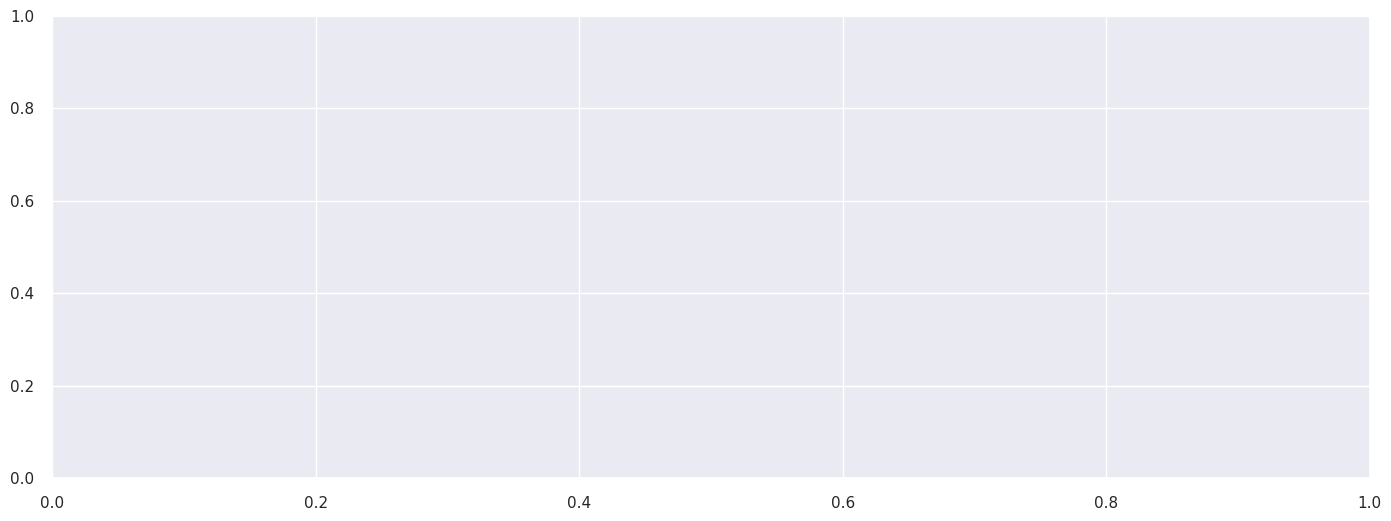

In [76]:
evaluate_model(tuned_best_model)

# **Classification + PCA**

In [77]:
clf_pca = setup(data=data, target='SL', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,SL
2,Target type,Multiclass
3,Original data shape,"(567, 9)"
4,Transformed data shape,"(567, 4)"
5,Transformed train set shape,"(396, 4)"
6,Transformed test set shape,"(171, 4)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [78]:
#show the best model and their statistics
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3410
knn,K Neighbors Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1930
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1860
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1870
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.8100
qda,Quadratic Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1870
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.7900
lda,Linear Discriminant Analysis,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3680
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6300
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2230


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [79]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model**

In [80]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [81]:
tuned_best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

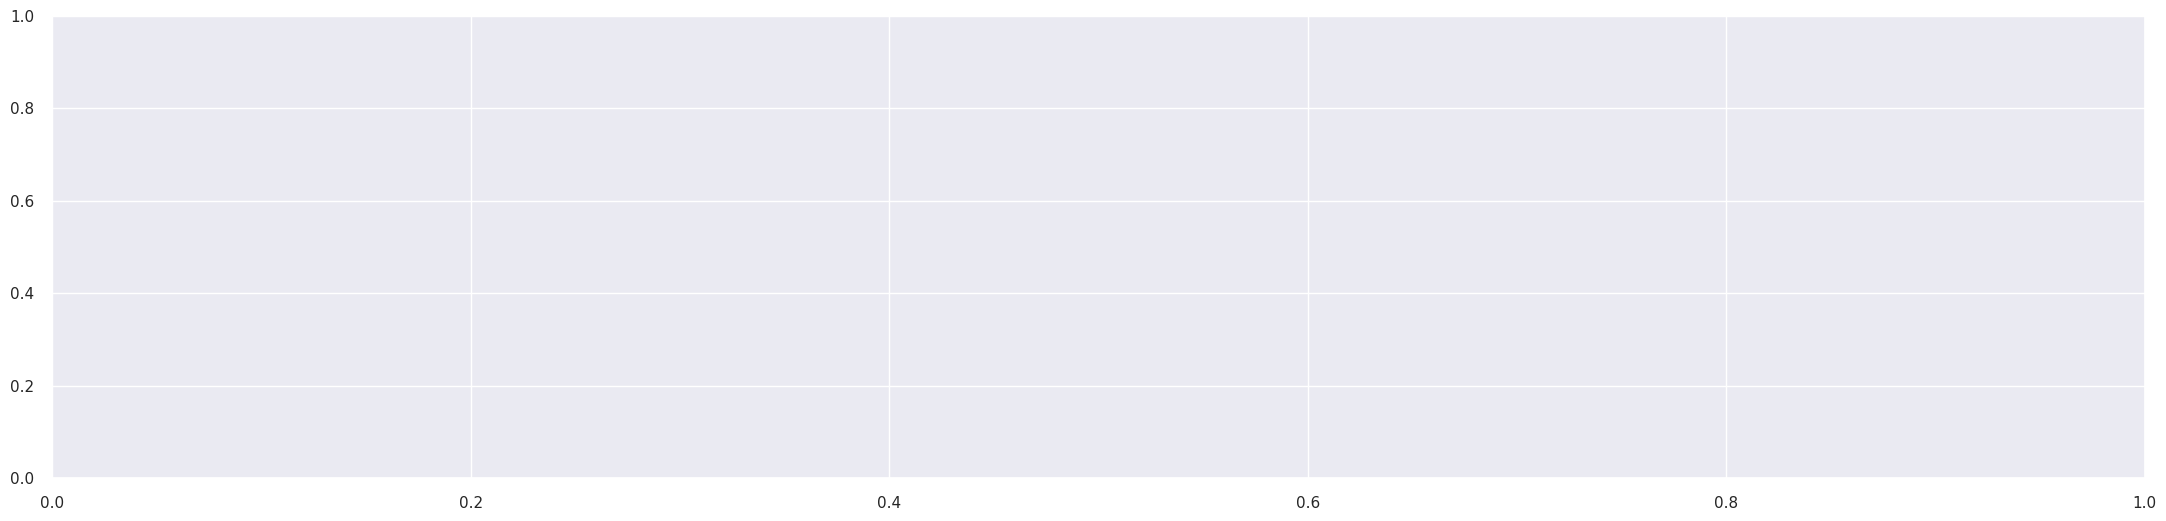

In [82]:
evaluate_model(tuned_best_model_pca)

# **Create Gradient Boosting Classifier**

In [83]:
gbc_pca = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [84]:
tuned_gbc_pca = tune_model(gbc_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [85]:
tuned_gbc_pca

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

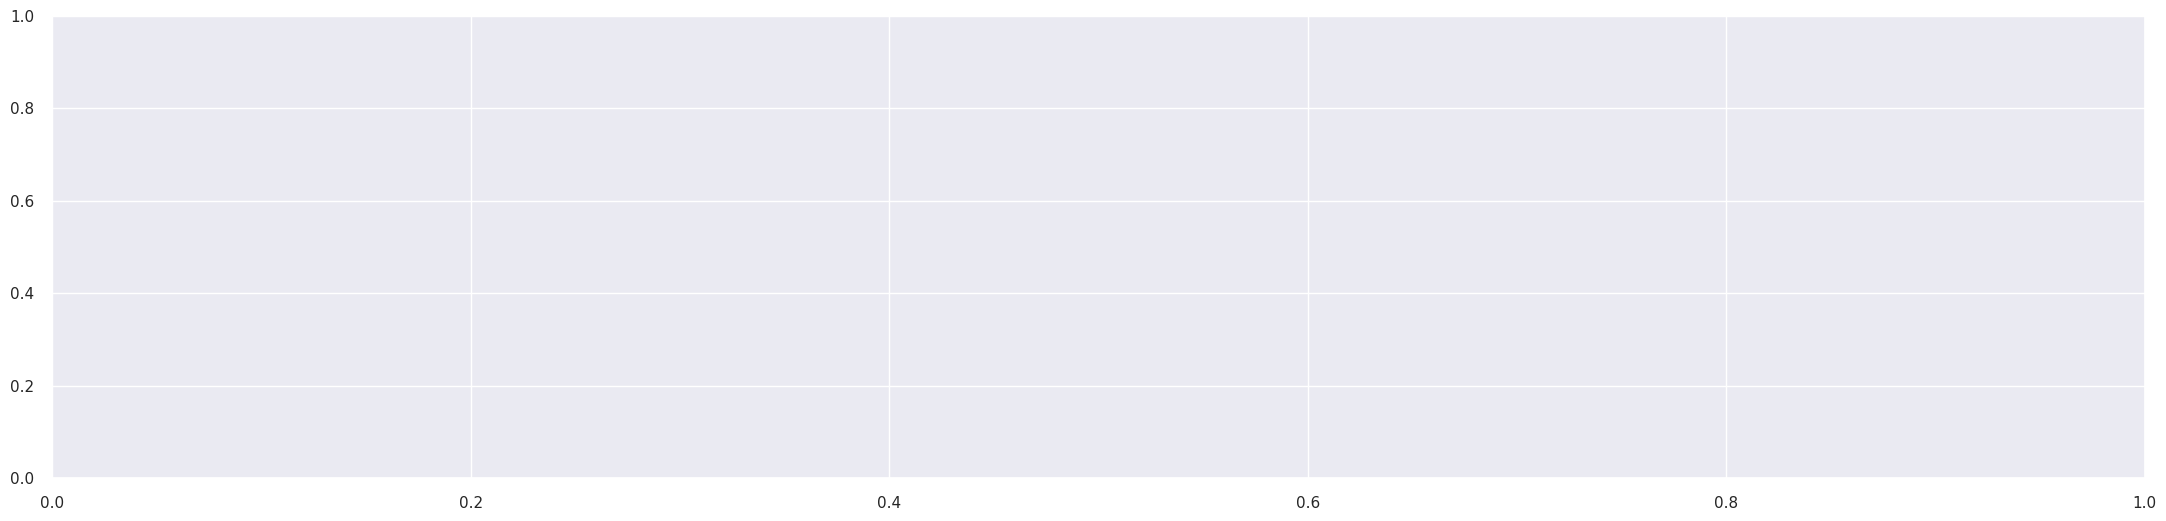

In [86]:
evaluate_model(tuned_gbc_pca)

# **Linear Discriminant Analysis**

In [87]:
lda_pca = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [88]:
tuned_lda_pca = tune_model(lda_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [89]:
tuned_lda_pca

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

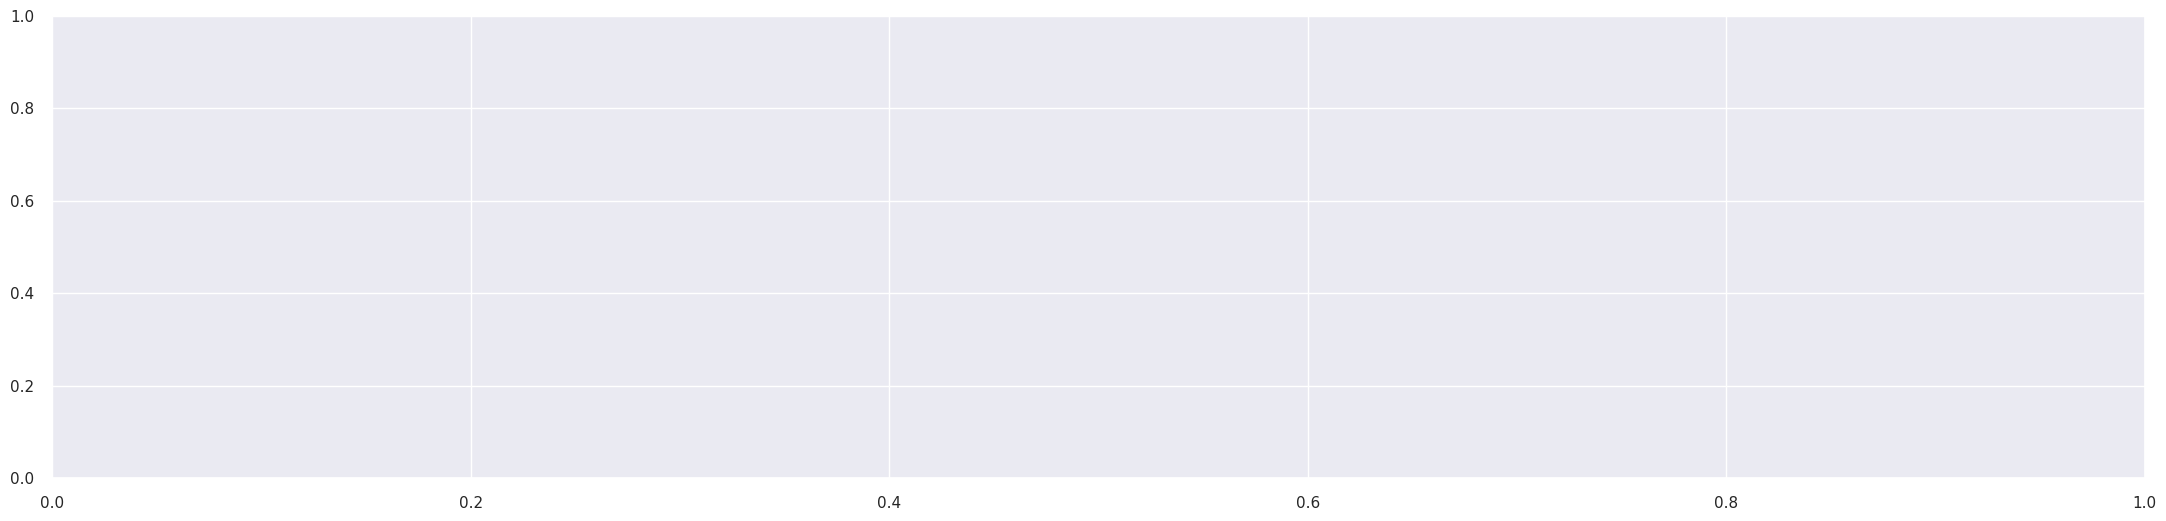

In [90]:
evaluate_model(tuned_lda_pca)

# **Explainable AI with Shapley values**

In [91]:
!pip3 install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
print(shap.__version__)

0.41.0


In [93]:
import shap


In [94]:
rf_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [95]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**SHAP Summary Plot**

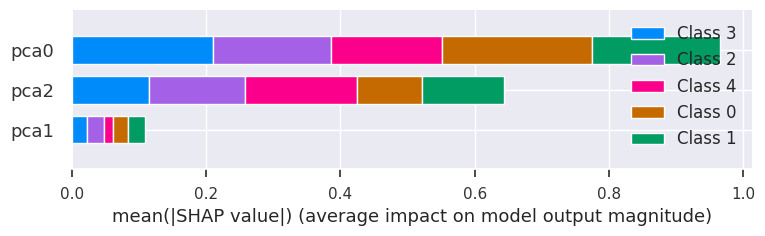

In [97]:
interpret_model(tuned_rf_pca, plot='summary')

**Visualize a single prediction**

In [98]:
interpret_model(tuned_rf_pca, plot='reason', observation=24)

**Visualize many predictions**

In [99]:
interpret_model(tuned_rf_pca, plot='reason')